**“EFFECTUAL PROPHECY OF HEART DISEASE  PROGNOSIS USING MACHINE LEARNING TECHNIQUES”**

**IMPORTING LIBRARIES** 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt#FOR PLOTING GRAPHS
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

['.config', 'ptest.csv', 'heart2.csv', 'heart1.csv', 'sample_data']


**READ THE CSV HEART DATA BASE**

In [2]:
data = pd.read_csv("/content/heart1.csv")
print(data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

**CHEACKING POSSIVE AND NEGATIVE DATA POINTS IN DATABASE**

1    526
0    499
Name: target, dtype: int64


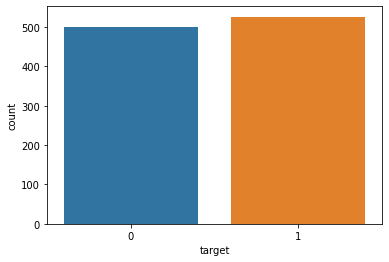

In [3]:
y = data["target"]

sns.countplot(y)


target_temp = data.target.value_counts()

print(target_temp)

**PRINTING THE FIRST 5 DATA POINTS**

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**DESCRIBE THE DATABASE**

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**READIONG THE INFORMATION**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**FINDING THE SIZE OF DATA**

In [7]:
data.shape

(1025, 14)

**SPLITTING OUTPUT AND INPUT**

In [8]:
x = data.drop('target',axis = 1) 
y = data.target
print(x)
print("\n\n\n")
print(y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

**70% training and 30% test**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,random_state=109) 
print(x_train)
print('\n')
print(y_train)
print('\n')
print(x_test)
print('\n')
print(y_test)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
301    51    1   2        94   227    0        1      154      1      0.0   
891    64    0   0       180   325    0        1      154      1      0.0   
739    52    1   0       128   255    0        1      161      1      0.0   
19     58    1   2       140   211    1        0      165      0      0.0   
841    35    0   0       138   183    0        1      182      0      1.4   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
801    63    1   3       145   233    1        0      150      0      2.3   
587    59    1   0       164   176    1        0       90      0      1.0   
399    63    1   3       145   233    1        0      150      0      2.3   
1008   42    1   1       120   295    0        1      162      0      0.0   
141    63    0   0       124   197    0        1      136      1      0.0   

      slope  ca  thal  
301       2   1     3  
891       2   0     2  
739

**SUPPORT VECTOR MACHINE**

**LINEAR SVM**

In [10]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
ml.fit(x_train, y_train)


#Predict the response for test dataset
y_pred = ml.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

**ACCURACY OF LINEAR SVM**


In [11]:
ml.score(x_test,y_test)

0.8733766233766234

In [12]:
confusion_matrix(y_test,y_pred)

array([[124,  26],
       [ 13, 145]])

**POLYNOMIAL SVM**

In [13]:
#Create a svm Classifier
ml = svm.SVC(kernel='poly',C=1000,degree=3) # polynomial

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

**ACCURACY OF POLYNOMIAL SVM**

In [14]:
ml.score(x_test,y_test)

0.8766233766233766

In [15]:
confusion_matrix(y_test,y_pred)

array([[123,  27],
       [ 11, 147]])

**RADIAL BASIS FUNCTION SVM**

In [16]:
#Create a svm Classifier
ml = svm.SVC(kernel='rbf',gamma=10,C=1000) # RBF

#Train the model using the training sets
ml.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = ml.predict(x_test)

**ACCURACY OF RADIAL BASIS FUNCTION SVM**

In [17]:
ml.score(x_test,y_test)

0.9772727272727273

In [18]:
confusion_matrix(y_test,y_pred)

array([[143,   7],
       [  0, 158]])

**DECISION TREE**

In [19]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    Y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)

**ACCURACY OF DECISION TREE**

In [20]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 99.03 %


**RANDOM FOREST**

In [21]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf= RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    Y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
Y_pred_rf = rf.predict(x_test)

99.03
0


**ACCURACY OF RANDOM FOREST**

In [22]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 99.03 %


**K NEAREST NEIGHBOR**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
max_accuracy=0
bk=0

for k in range(300):
    if k==0:
      continue
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    Y_pred_dt = knn.predict(x_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        bk= k

knn = KNeighborsClassifier(n_neighbors=bk)
knn.fit(x_train,y_train)
Y_pred_knn=knn.predict(x_test)

**ACCURACY OF K NEAREST NEIGHBOR**

In [24]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 97.08 %


**FINDING TEST ACCURASY FOR NEW UNSEEN 303 DATA IN A DIFFRENT DATASET**

In [25]:
testdata=pd.read_csv("/content/heart2.csv")
x_newdata=testdata.drop('target',axis=1)
y_accual=testdata.target


In [26]:
y_pred=ml.predict(x_newdata)
y_accual
confusion_matrix(y_accual,y_pred)

array([[136,   2],
       [  0, 165]])

**SVM TEST ACCURACY WITH NEW DATABASE 97.7%**

In [27]:
y_predrf=rf.predict(x_newdata)
confusion_matrix(y_accual,y_predrf)

array([[138,   0],
       [  1, 164]])

**THE TEST ACCURACY OF RF FOR NEW UNSEEN DATA IS 99.6%**

In [28]:
y_predknn=dt.predict(x_newdata)
print(y_predknn)
print('\n\n')
print(y_accual)

confusion_matrix(y_accual,y_predknn)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]



0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


array([[138,   0],
       [  1, 164]])

**SO, THE TEST ACCURACY FOR DECISION TREE FOR NEW DATA SET IS 99.66%**

In [29]:
y_predknn=knn.predict(x_newdata)
confusion_matrix(y_accual,y_predknn)

array([[137,   1],
       [  2, 163]])

**THE TEST ACCURACY OF KNN FOR UNSEEN DATASET IS 99%**

**TEST SINGLE PERSON DATA**

In [30]:
print("enter the patient data (13 attributes )")
pdata=pd.read_csv("/content/ptest.csv")
y_prednt=dt.predict(pdata)
print(y_prednt)
print('\n')
if y_prednt[0]==0:
  print("The patient has no heart disease")
else:
  print("The patient have heart disease") 

enter the patient data (13 attributes )
[0]


The patient has no heart disease


In [31]:
print("Enter the patient data (13 attributes )")
dist={}
dist["age"]=int(input("enter your age: "))
dist["sex"]=int(input("enter your sex (0-female 1-for male: "))
dist["cp"]=int(input("enter cp value: "))
dist["trestbps"]=int(input("enter trestbps: "))
dist["chol"]=int(input("enter chol: "))
dist["fbs"]=int(input("enter fbs value: "))
dist["restecg"]=int(input("enter restecg: "))
dist["thalach"]=int(input("enter thalach: "))
dist["exang"]=int(input("enter exang: "))
dist["old peak"]=float(input("enter oldpeak: "))
dist["slop"]=int(input("enter slop: "))
dist["ca"]=int(input("enter ca: "))
dist["thal"]=int(input("enter thal: "))
df=pd.DataFrame(dist,index=[0])
print(df)
print('\n')

y_prednt=dt.predict(df)
print(y_prednt)
print('\n')

if y_prednt[0]==0:
  print("The patient has no heart disease")
else:
  print("The patient have heart disease") 

Enter the patient data (13 attributes )
enter your age: 52
enter your sex (0-female 1-for male: 1
enter cp value: 0
enter trestbps: 125
enter chol: 212
enter fbs value: 0
enter restecg: 1
enter thalach: 168
enter exang: 0
enter oldpeak: 1
enter slop: 2
enter ca: 2
enter thal: 3
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  old peak  slop  \
0   52    1   0       125   212    0        1      168      0       1.0     2   

   ca  thal  
0   2     3  


[0]


The patient has no heart disease
